<a href="https://colab.research.google.com/github/MvMukesh/NeuralNetwork-EmergencyVehicle_Classification/blob/main/Neural%20network%20and%20hyperparameter%20tuning%20in%20keras/Neural_Networks_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

# 1. Loading the dataset

In [163]:
import numpy as np   # image to array
import pandas as pd  # read csv
import glob as glob  # reading multiple images together
import matplotlib.pyplot as plt

from keras.layers import InputLayer,Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from keras.optimizers import Adam

### Loading from drive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip /content/drive/My\ Drive/Dataset.zip

## Loading from git

In [7]:
!git clone https://github.com/MvMukesh/NeuralNetwork-EmergencyVehicle_Classification.git

Cloning into 'NeuralNetwork-EmergencyVehicle_Classification'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 11), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
cd NeuralNetwork-EmergencyVehicle_Classification/Neural network and hyperparameter tuning in keras

In [24]:
ls

Dataset.zip  Neural_Networks_using_Keras.ipynb


In [ ]:
!unzip Dataset.zip

In [26]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [27]:
data.shape

(2352, 2)

In [28]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


#### Class Distribution

In [32]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

#### Loading Image to Store them in NP array

In [33]:
X = []   # images box

for img_name in data.image_names:
    img = plt.imread('Dataset/images/' + img_name)
    X.append(img)

### List of images into array

In [34]:
X = np.array(X)
y = data.emergency_or_not.values  #target var 

In [36]:
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

* `2352` => `No. of images`
* `224,224` => `Height & Width of images`
* `3` => `No. of chanell` tells image are in RGB format

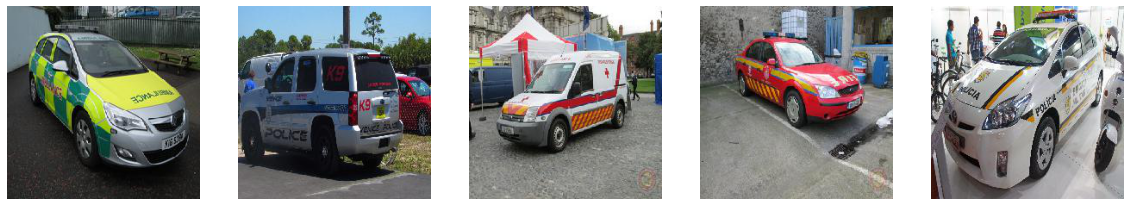

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))

for i in range(5):
    ax[i].imshow(X[i*100])
    ax[i].axis('off')

# 2. Pre-processing the data
* Chande 3d input to 1d
  * NN only takes 1d input

In [48]:
# converting 3 dimensional image to 1 dimensional image

X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

* `reshape(no.ofimages, newSizeOfEachImage)`
* `X.shape` output =>  `(no.OfImages, Features)`

In [49]:
# minimum and maximum pixel values of images

X.min(), X.max()

(0, 255)

In [51]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

* `(0,1) denotes intensity fo pixels` 
* `0 pixel value denotes` => `Black`
* `1 pixel value denotes` => `White`

**Normalizing pixels value will**
* reduce training time
* efficient computation

* value can be put in (0,255) range


# 3. Creating training and validation set

In [66]:
# Random number generator

seed = 42
rng = np.random.RandomState(seed)

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# 4. Defining model architecture

In [71]:
## input shape
X_train.shape[1]  # 224 * 224 * 3

150528

In [65]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


* units=1 => single output layer as problem is Binary Classification
* `15052900` => `trainable parameter` => `weight matrix + bias values`

# 5. Compiling the model
* Specifying `Loss` & `Optimizer` 

In [73]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the model
* `batch_size` => `no. of training example used in single iteration`
* `batch_size = 128` => `means, 128 images will get loaded as model will get trainig on these 128 images`

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

* At end of 50 epoc `model loss, accuracy` can be seen
* model_history having all model loss and accuracy in it of test and validation

## 7. Evaluating model performance

##### Prediction on Validation Set
* Prediction in form of:
  * Class
  * Probabilities

In [86]:
predictions = model.predict_classes(X_valid)[:, 0]       # class values
prediction_probabilities = model.predict(X_valid)[:, 0]  # prob values

* `model.predict_classes` return predicted classes values against X_valid)[:, 0] classes

###### Accuracy on Validation set

In [87]:
accuracy_score(y_valid, predictions)   # (original values, predicted values)

0.7393767705382436

###### Summarize model_history loss for 50Epoch
* model_history is saved in var model_history

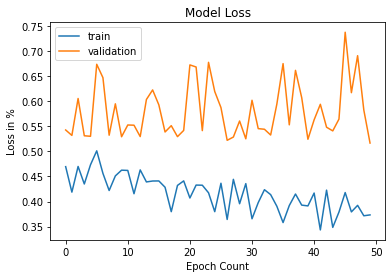

In [90]:
plt.plot(model_history.history['loss'])         # training loss for each epoch
plt.plot(model_history.history['val_loss'])     # validation loss for each epoch
plt.title('Model Loss')
plt.ylabel('Loss in %')
plt.xlabel('Epoch Count')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### Summarize model_history accuracy for each 50 epoch

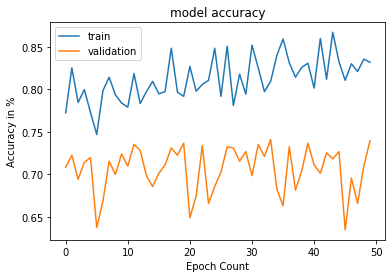

In [92]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy in %')
plt.xlabel('Epoch Count')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* Training accuracy is incressing
* Validation accuracy remains same

#### Taking Some Example from training set and have a look what model did predicted for them
* Taking original data not preprocessed data

In [96]:
# pull out the original images from the data which correspond to the validation data

_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

* `-` => dummy var. as we dont nead trainig img

In [158]:
# get a random index to plot image randomly

index = rng.choice(range(len(valid_vehicles)))

In [159]:
# get the corresponding image name and probability based on randome index

img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

In [160]:
# read the image
img = plt.imread('Dataset/images/' + img_name)

In [161]:
# print probability and actual class of image
print('Model is', prob , '% sure that this is an emergency')
print('Actual class is ', valid_y[index])


Model is 21 % sure that this is an emergency
Actual class is  0


(-0.5, 223.5, 223.5, -0.5)

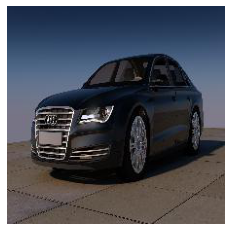

In [162]:
plt.imshow(img)
plt.axis('off')

----
----

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

#### 1. Changing activation function of hidden layer

In [110]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))        # hidden layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


* `Activation Function` of `Hidden layer` has been `changed from` `sigmoid to relu` will try with `tanh` in past

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

In [112]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7181303116147308 %


###### Summarize model_history for loss

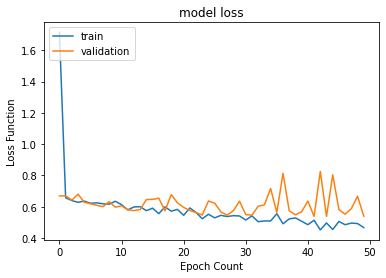

In [113]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss Function')
plt.xlabel('Epoch Count')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* `relu activation function` conversing loss so fast 

#### 2. Increasing hidden neurons

In [114]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

* `hidden neuron count = 1024` previou count = 100
* `activation function` = `sigmoid`

In [115]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              154141696 
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

In [117]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7096317280453258 %


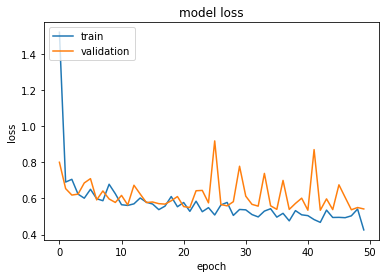

In [118]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* up to `epoch =20` bot training and validation lose is foot on 
* after 20 epoch trainin loss decreases 

#### 3. Increasing hidden layers

In [119]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])
model.summary()

* two hiddent layer added with 100 neurons and activation as sigmoid
* `Incresing number of hidden layer mean extracting granual features`

In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid,y_valid))

In [122]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6954674220963173 %


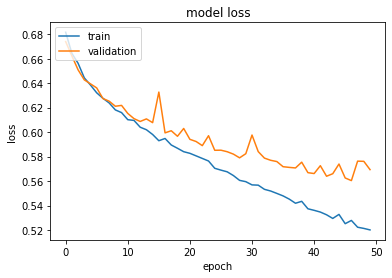

In [123]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* up to 15 epoch validation loss decreases with training loss after that significant diffrence can be observed

#### 4. Increasing number of epochs

In [140]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [141]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.7677 - accuracy: 0.5614 - val_loss: 0.6589 - val_accuracy: 0.5680
Epoch 2/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6424 - accuracy: 0.6349 - val_loss: 0.6541 - val_accuracy: 0.5822
Epoch 3/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6273 - accuracy: 0.6488 - val_loss: 0.6115 - val_accuracy: 0.6898
Epoch 4/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6278 - accuracy: 0.6519 - val_loss: 0.6193 - val_accuracy: 0.6586
Epoch 5/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5950 - accuracy: 0.6999 - val_loss: 0.6459 - val_accuracy: 0.6176
Epoch 6/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6202 - accuracy: 0.6622 - val_loss: 0.6084 - val_accuracy: 0.6586
Epoch 7/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6036

* epoch=100 doubling epoch count
* epoch value can be increase to  much as may lead to Overfitting of model

In [144]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6742209631728046 %


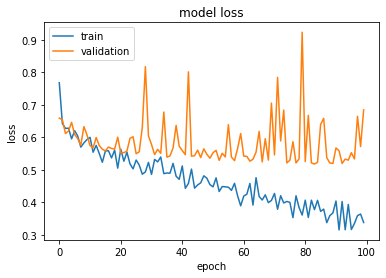

In [145]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### 5. Changing the optimizer
* `Upto now optimizer used was SGD(stochastic gradient descent optimizer)`
  * `sgd` => `have high chance of getting stuck at local minima`
* Using `Adam` with `lr => learningRate of 10^-5`

In [148]:
adam = Adam(lr=1e-5)

In [164]:
model = Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  # adam optimizer

In [129]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid,y_valid))

In [152]:
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7294617563739377 %


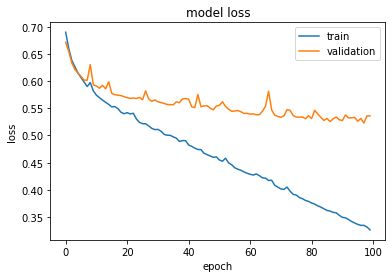

In [153]:
# loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

* `adam` converge model very fast and then overfit

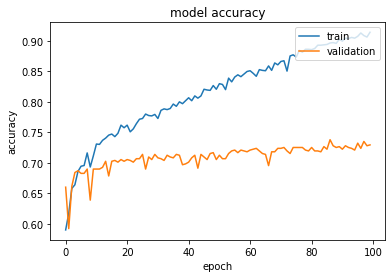

In [154]:
# accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

* Model is overfitting after less then 10 epoch

**~In Future we will work on Overfitting~**